In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import comb

In [ ]:
# Observed reviews
n = 100
x_obs = 97

# MLE (Maximum Likelihood Estimate) of success probability
p_hat = x_obs / n
print("MLE (p̂):", p_hat)


MLE (p̂): 0.97


In [ ]:
# Wilson confidence interval calculation
z = 1.96   # for 95% confidence
den = 1 + z**2 / n
center = (p_hat + z**2/(2*n)) / den
half_width = (z / den) * np.sqrt((p_hat*(1-p_hat)/n) + (z**2/(4*n**2)))
wilson_low = center - half_width
wilson_high = center + half_width

print(f"95% CI (Wilson): [{wilson_low:.4f}, {wilson_high:.4f}]")


95% CI (Wilson): [0.9155, 0.9897]


In [ ]:
def binom_pmf(n, k, p):
    """Probability of exactly k successes in Binomial(n,p)"""
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

def tail_prob_ge(n, k, p):
    """Probability of at least k successes"""
    return sum(binom_pmf(n, j, p) for j in range(k, n+1))


In [ ]:
# Try different candidate values of p
p_candidates = [0.90, 0.94, 0.96, 0.97, 0.98, 0.99]

summary = []

for p in p_candidates:
    likelihood = binom_pmf(n, x_obs, p)    # P(X=97 | p)
    tail_prob = tail_prob_ge(n, x_obs, p)  # P(X >= 97 | p)

    summary.append([p, likelihood, tail_prob])

df_summary = pd.DataFrame(summary, columns=["Candidate p", "P(X=97|p)", "P(X>=97|p)"])
df_summary


,Candidate p,P(X=97|p),P(X>=97|p)
0,0.90,0.005892,0.007836
1,0.94,0.086410,0.143023
2,0.96,0.197333,0.429476
3,0.97,0.227474,0.647249
4,0.98,0.182276,0.858962
5,0.99,0.060999,0.981626


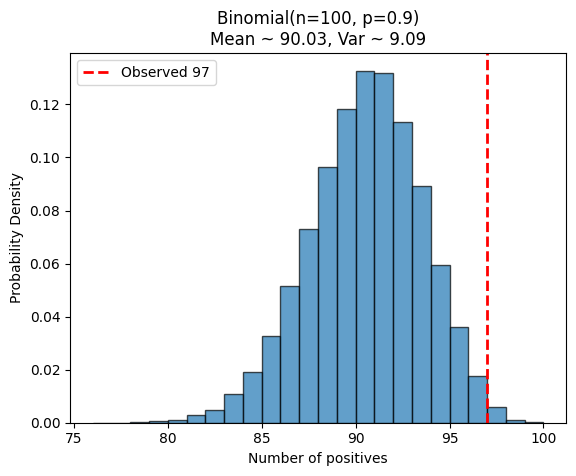

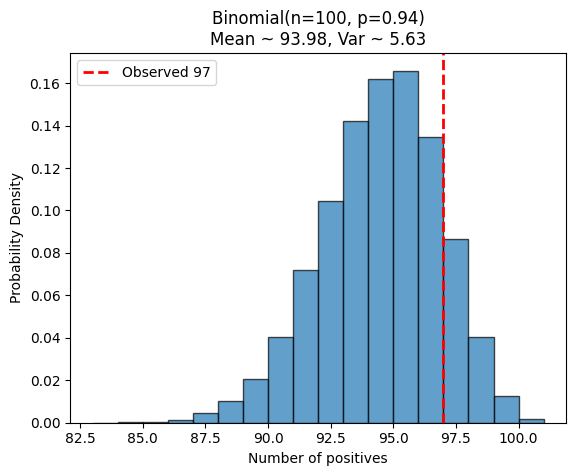

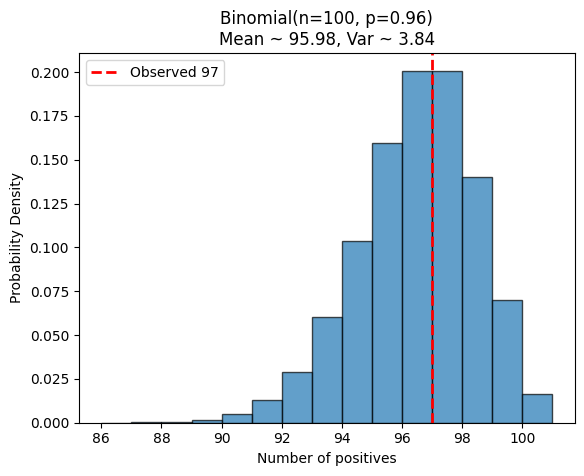

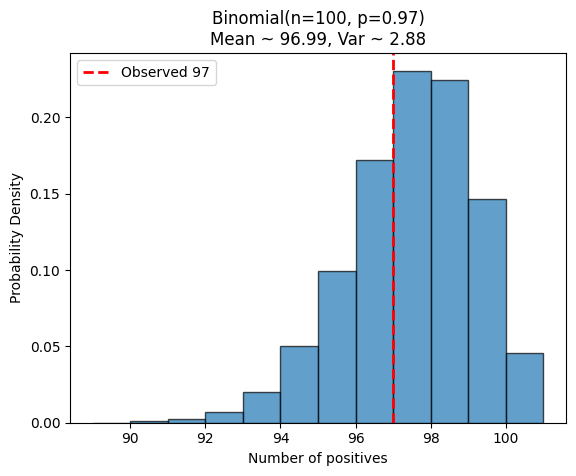

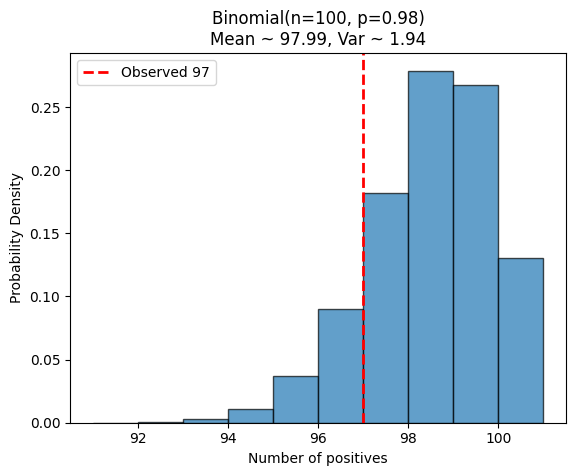

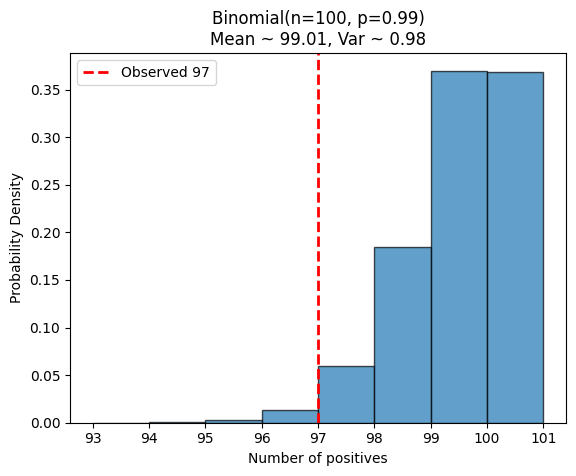

In [ ]:
# Simulate 20,000 experiments for each p and plot histograms
num_sims = 20000

for p in p_candidates:
    samples = np.random.binomial(n=n, p=p, size=num_sims)

    plt.hist(samples, bins=range(min(samples), max(samples)+2),
             density=True, edgecolor="black", alpha=0.7)
    plt.axvline(x_obs, color="red", linestyle="--", linewidth=2,
                label=f"Observed {x_obs}")
    plt.title(f"Binomial(n=100, p={p})\nMean ~ {np.mean(samples):.2f}, Var ~ {np.var(samples):.2f}")
    plt.xlabel("Number of positives")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()


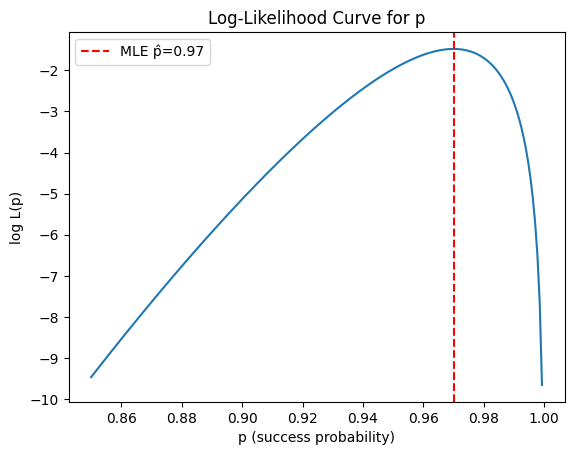

In [ ]:
# Fine grid of p values to visualize the likelihood peak
p_grid = np.linspace(0.85, 1.0, 200)
log_likelihoods = [np.log(binom_pmf(n, x_obs, p)) if binom_pmf(n, x_obs, p) > 0 else -np.inf
                   for p in p_grid]

plt.plot(p_grid, log_likelihoods)
plt.axvline(p_hat, color="red", linestyle="--", label=f"MLE p̂={p_hat:.2f}")
plt.title("Log-Likelihood Curve for p")
plt.xlabel("p (success probability)")
plt.ylabel("log L(p)")
plt.legend()
plt.show()